In [1]:
%matplotlib inline
%load_ext ipython_unittest
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, BatchNormalization, Dropout
from keras import optimizers

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data/market_data.csv').drop(columns=['Unnamed: 0', 'Time'])
num_of_ts = data.shape[1]
data_numpy = data.values.T
np.random.shuffle(data_numpy)

In [3]:
n_steps_for_train = 60
n_samples = num_of_ts/2

x_train = data_numpy[:num_of_ts/2, :n_steps_for_train].reshape(n_samples, n_steps_for_train, 1) * 2000
y_train = data_numpy[:num_of_ts/2, n_steps_for_train:] * 2000

x_test = data_numpy[num_of_ts/2:, :n_steps_for_train].reshape(n_samples, n_steps_for_train, 1) * 2000
y_test = data_numpy[num_of_ts/2:, n_steps_for_train:] * 2000


In [23]:
input_dim = n_steps_for_train
model = Sequential()
model.add(Convolution1D(filters=4, kernel_size=4, input_shape=(60 ,1), activation='sigmoid'))
model.add(Convolution1D(filters=4, kernel_size=4, activation='relu'))
model.add(Convolution1D(filters=4, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense(units=64, kernel_initializer='normal'))
# model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units=60, actiivation='relu'))
# model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=120-input_dim, activation='linear'))


# sgd = optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mae'])

history = model.fit(x_train, y_train, epochs=30, batch_size=16, validation_split=.3, verbose=2)

Train on 3198 samples, validate on 1371 samples
Epoch 1/30
 - 1s - loss: 0.0650 - mean_absolute_error: 0.2004 - val_loss: 0.0374 - val_mean_absolute_error: 0.1577
Epoch 2/30
 - 1s - loss: 0.0273 - mean_absolute_error: 0.1287 - val_loss: 0.0216 - val_mean_absolute_error: 0.1132
Epoch 3/30
 - 1s - loss: 0.0191 - mean_absolute_error: 0.1058 - val_loss: 0.0171 - val_mean_absolute_error: 0.1010
Epoch 4/30
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0907 - val_loss: 0.0126 - val_mean_absolute_error: 0.0846
Epoch 5/30
 - 1s - loss: 0.0118 - mean_absolute_error: 0.0825 - val_loss: 0.0118 - val_mean_absolute_error: 0.0817
Epoch 6/30
 - 1s - loss: 0.0110 - mean_absolute_error: 0.0795 - val_loss: 0.0125 - val_mean_absolute_error: 0.0849
Epoch 7/30
 - 1s - loss: 0.0108 - mean_absolute_error: 0.0786 - val_loss: 0.0106 - val_mean_absolute_error: 0.0766
Epoch 8/30
 - 1s - loss: 0.0105 - mean_absolute_error: 0.0772 - val_loss: 0.0103 - val_mean_absolute_error: 0.0757
Epoch 9/30
 - 1s - loss: 0.0102 

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 57, 4)             20        
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 54, 4)             68        
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 51, 4)             68        
_________________________________________________________________
flatten_7 (Flatten)          (None, 204)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                6560      
_________________________________________________________________
activation_7 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 60)                1980      
Total para

In [107]:
history.history['mean_absolute_error']

[0.30721188150695744,
 0.16818055955971534,
 0.1579938740320993,
 0.1502874677370607,
 0.14241689387673956,
 0.13425954884201233,
 0.12645279224251418,
 0.11914170206319995,
 0.1128322872903438,
 0.10751718840444736,
 0.10325746129664724,
 0.09970105099745137,
 0.09688095158994608,
 0.09446627373170524,
 0.09257468106859994,
 0.09087255161448968,
 0.0894611828154963,
 0.08816480544804035,
 0.08701997197199941,
 0.08606938054648841,
 0.08513474862805898,
 0.08429125529609671,
 0.08344838275266037,
 0.08276298526136334,
 0.08210320398910408,
 0.08146659229847697,
 0.08091100999588069,
 0.08041253856489851,
 0.07992326229195658,
 0.07943130756091743]

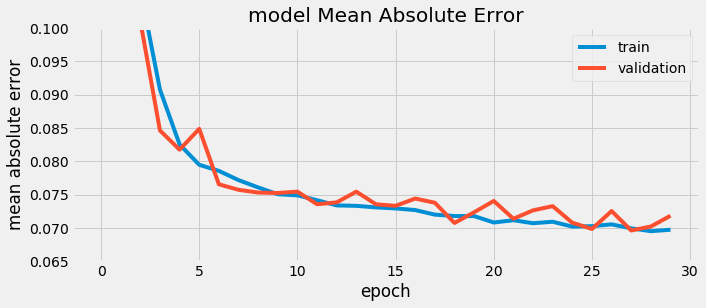

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 4))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'], )
plt.ylim(.065, .1)
plt.title('model Mean Absolute Error')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show();

In [ ]:
y_pred_train = model.predict(x_train)

random_indexes = range(data.shape[1]/2)
random.shuffle(random_indexes)

for i in random_indexes[:5]:
    plt.figure()
    plt.plot(range(60), x_train[i], marker='o', markersize=3, label='input')
    plt.plot(range(60, 120), y_train[i], label='true')
    plt.plot(range(60, 120), y_pred_train[i], c='m', label='prediction')
    plt.title('train')
    plt.legend()

/Users/mdymshits/virtualenv/ir-threat/lib/python2.7/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


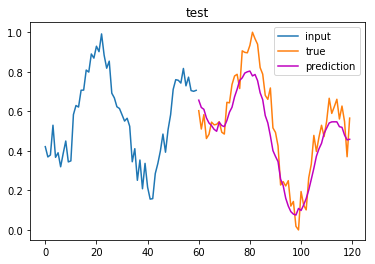

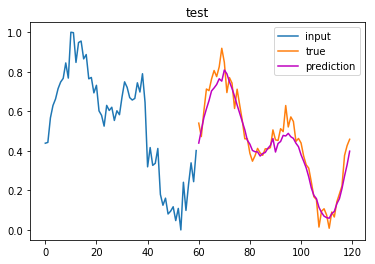

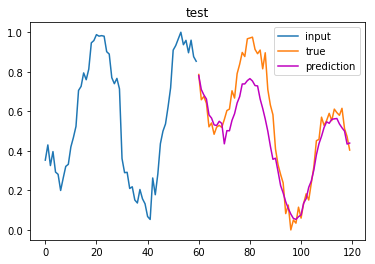

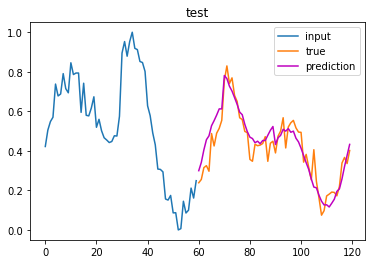

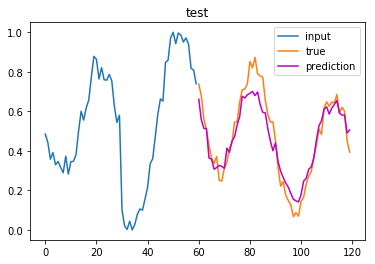

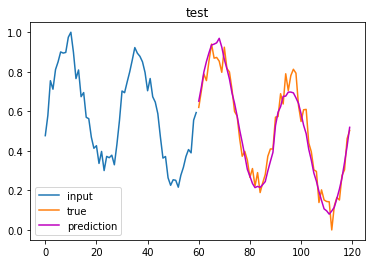

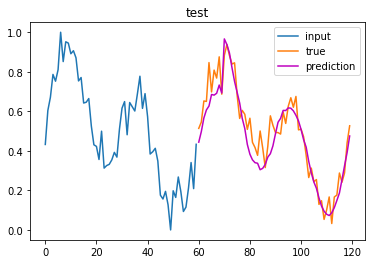

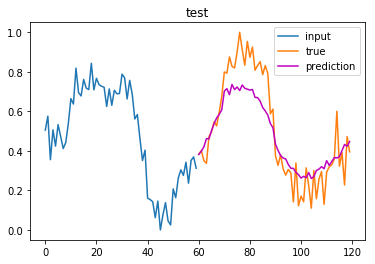

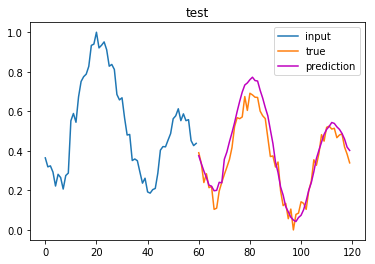

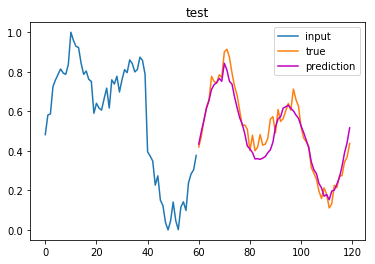

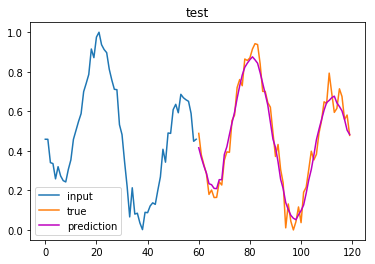

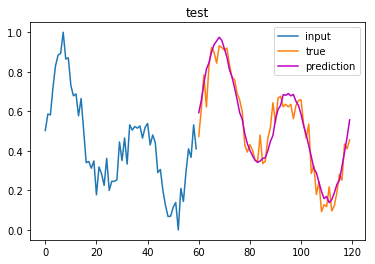

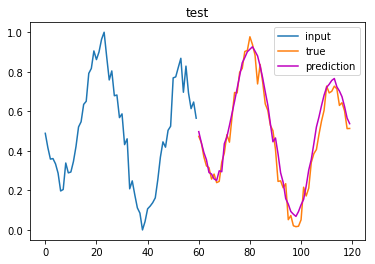

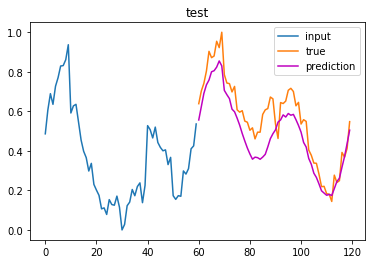

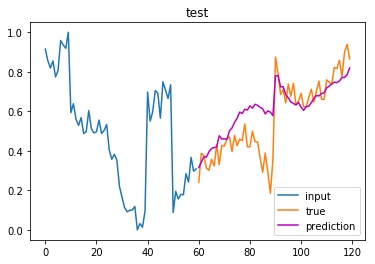

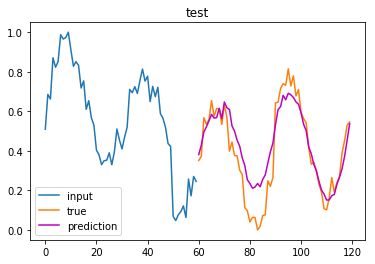

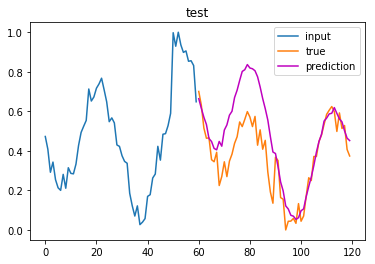

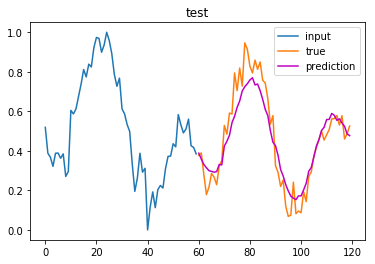

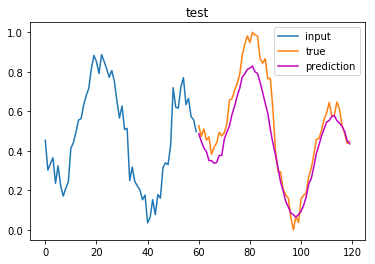

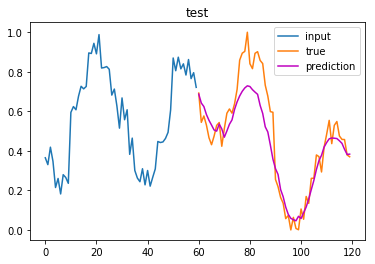

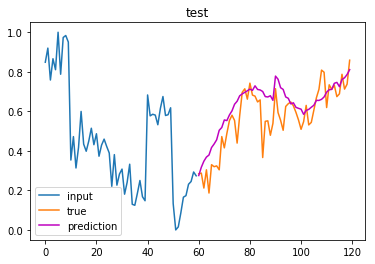

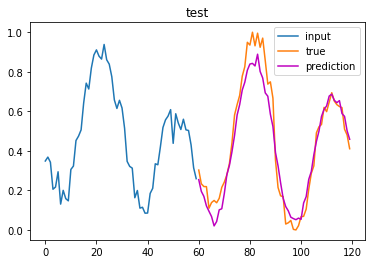

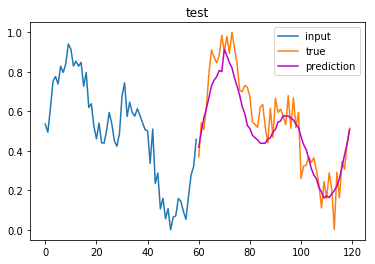

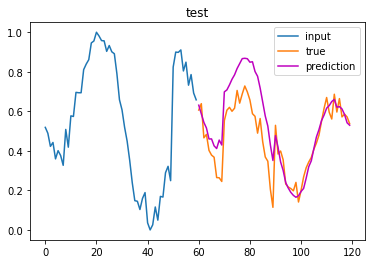

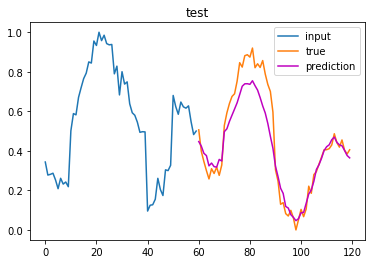

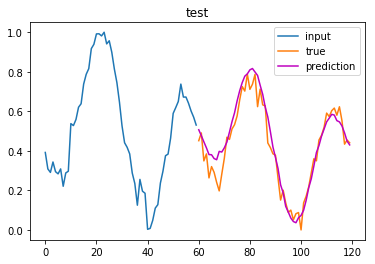

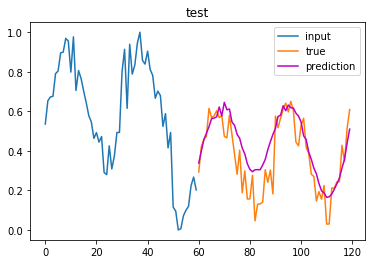

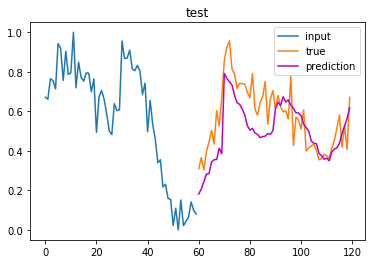

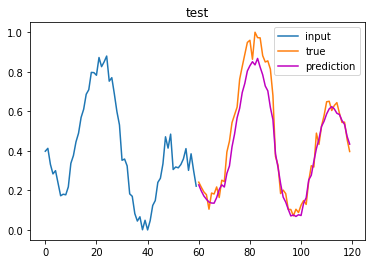

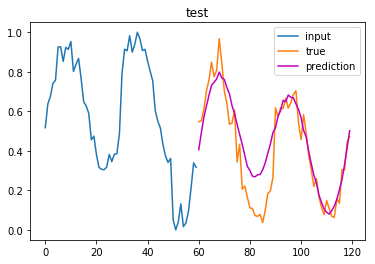

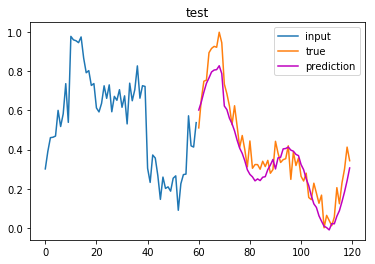

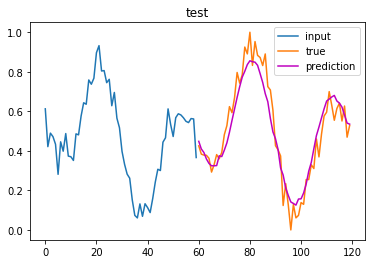

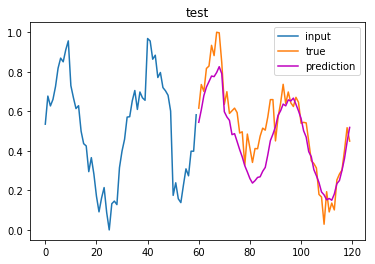

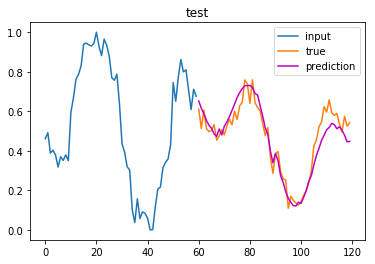

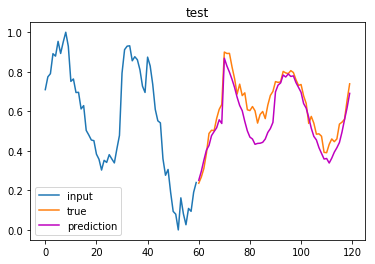

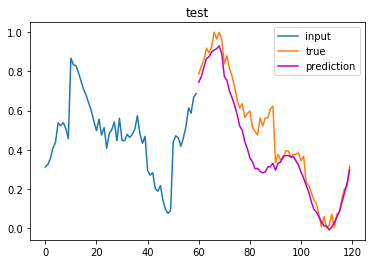

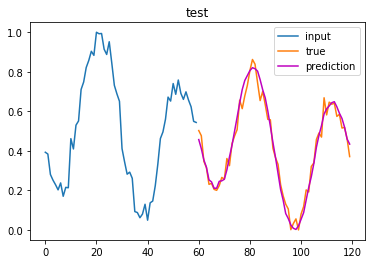

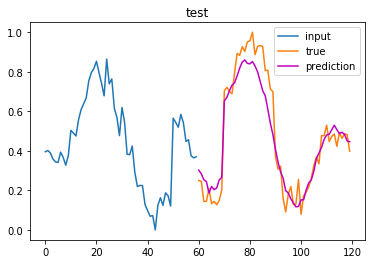

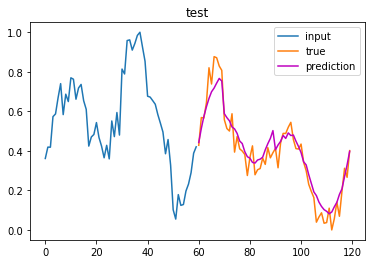

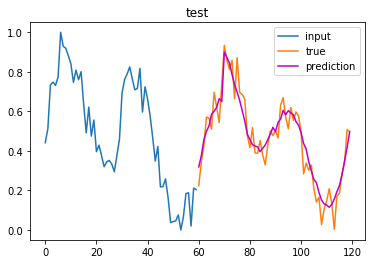

In [8]:
y_pred_test = model.predict(x_test)

random_indexes = range(data_numpy.shape[0]/2)
random.shuffle(random_indexes)

for i in random_indexes[:40]:
    plt.figure()
    plt.plot(range(60), x_test[i], label='input')
    plt.plot(range(60, 120), y_test[i], label='true')
    plt.plot(range(60, 120), y_pred_test[i], c='m', label='prediction')
    plt.title('test')
    plt.legend()

# Trading

In [11]:
y_pred_test = model.predict(x_test) / 2000

cost_function = []
for n in np.linspace(0, 1, 20):
    trade = np.zeros((data.shape[1], 2), dtype=float)
    for i in range(num_of_ts/2):
        std = np.std(y_pred_test[i, :])
        _, min_element_spread, max_element_spread = max_diff(y_pred_test[i, :])
        min_achieved = False
        for val in y_pred_test[i, :]:
            if val < min_element_spread + n * std:
                trade[i, 0] = val
                min_achieved = True
            if min_achieved and val > max_element_spread - n * std:
                trade[i, 1] = val

                break

    cost_function_n = np.sum(trade[:, 1] - trade[:, 0])
    cost_function.append(cost_function_n)
    print 'We have earned {:.3f} with gap parameter = {:.2f}'.format(cost_function_n, n)       

We have earned -0.227 with gap parameter = 0.00
We have earned 1.022 with gap parameter = 0.05
We have earned 0.997 with gap parameter = 0.11
We have earned 0.963 with gap parameter = 0.16
We have earned 0.928 with gap parameter = 0.21
We have earned 0.892 with gap parameter = 0.26
We have earned 0.843 with gap parameter = 0.32
We have earned 0.783 with gap parameter = 0.37
We have earned 0.738 with gap parameter = 0.42
We have earned 0.701 with gap parameter = 0.47
We have earned 0.661 with gap parameter = 0.53
We have earned 0.620 with gap parameter = 0.58
We have earned 0.578 with gap parameter = 0.63
We have earned 0.534 with gap parameter = 0.68
We have earned 0.490 with gap parameter = 0.74
We have earned 0.446 with gap parameter = 0.79
We have earned 0.407 with gap parameter = 0.84
We have earned 0.372 with gap parameter = 0.89
We have earned 0.337 with gap parameter = 0.95
We have earned 0.303 with gap parameter = 1.00


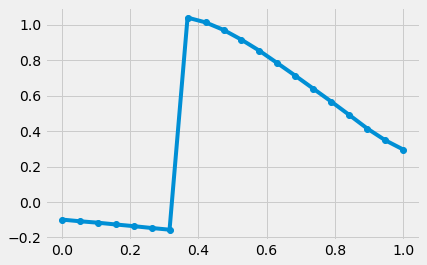

In [95]:
plt.plot(np.linspace(0, 1, 20), cost_function, marker='o');

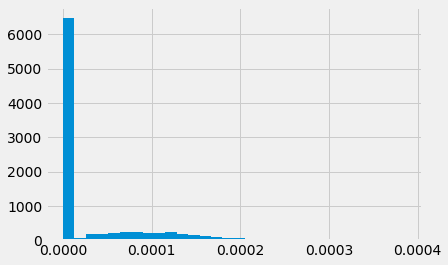

In [108]:
plt.hist(trade[:, 1] - trade[:, 0], bins=30);

NameError: name 'data' is not defined

### Let's calculate the Upper Bound of the revenue

First - Naive calculation

In [ ]:
naive_upper_bound = np.sum(np.max(data.values[60:, :], axis=0) - np.min(data.values[60:, :], axis=0))
print 'naive upper bound = {:.2f}'.format(naive_upper_bound)

The more realistic calculation:

(Considering, that minimum should appear before maximum)

In [ ]:
real_upper_bound = np.sum(max_diff(data.values[60:, col]) for col in range(data.values.shape[1]))
print 'real upper bound = {:.2f}'.format(real_upper_bound)

In [ ]:
np.sum(trade[:, 1] - trade[:, 0])

In [ ]:
plt.hist(trade[:, 1] - trade[:, 0], bins=30);

In [ ]:
!mv max_diff.png img/


<img src="img/max_diff.png",width=400,height=400>

# Functions
Functions for finding Minimum and Maximum in array, while minimum should be before maximum ("maximum spread").

In [10]:
def max_diff(arr):
    
    """returns max difference in list, such that
    mininmum appears before maximum"""
    
    max_diff = arr[1] - arr[0]
    min_element = arr[0]
    for val in arr:
        if val - min_element > max_diff:
            min_element_spread = min_element
            max_element_spread = val
            max_diff = val - min_element         
        if val < min_element:
            min_element = val
            
    return max_diff, min_element_spread, max_element_spread

In [ ]:
%%unittest_testcase

def test_max_diff(self):
    arr = [9, 1, 2, 4, 10, -10]
    res = (9, 1, 10)
    self.assertTupleEqual(max_diff(arr), res)